> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** lucas takeshi, Jonathan Lopes, Matheus Silva
* **Matrícula:** 2665, 2666, 2649

----
# Importação dos Dados

**Etapa 1 - Escolha dos dados e planejamento**

In [ ]:
#Importações de databases
#Etapa 1

!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_lobby_stats_player.csv
!wget https://raw.githubusercontent.com/LTaka/cs-go-csv/main/players1.csv


--2022-07-24 22:31:35--  https://raw.githubusercontent.com/LTaka/cs-go-csv/main/tb_lobby_stats_player.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28373607 (27M) [text/plain]
Saving to: ‘tb_lobby_stats_player.csv.11’

tb_lobby_stats_play 100%[===================>]  27.06M   147MB/s    in 0.2s    

2022-07-24 22:31:35 (147 MB/s) - ‘tb_lobby_stats_player.csv.11’ saved [28373607/28373607]

--2022-07-24 22:31:36--  https://raw.githubusercontent.com/LTaka/cs-go-csv/main/players1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [ ]:
#importações das bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

**Etapa 2 - Preparação e análise exploratória dos dados**

Tratamento de dados

In [ ]:
df_compare = pd.read_csv('./players1.csv')
df_compare = df_compare.drop("team",axis=1)
df_compare = df_compare.drop("date",axis=1)
df_compare = df_compare.drop("opponent",axis=1)
df_compare = df_compare.drop("country",axis=1)
df_compare = df_compare.drop("player_id",axis=1)
df_compare = df_compare.drop("match_id",axis=1)
df_compare = df_compare.drop("event_id",axis=1)
df_compare = df_compare.drop("event_name",axis=1)
df_compare = df_compare.drop("best_of",axis=1)
df_compare = df_compare.drop("map_2",axis=1)
df_compare = df_compare.drop("map_3",axis=1)
df_compare = df_compare.drop("kills",axis=1)
df_compare = df_compare.drop("assists",axis=1)
df_compare = df_compare.drop("deaths",axis=1)
df_compare = df_compare.drop("hs",axis=1)
df_compare = df_compare.drop("flash_assists",axis=1)
df_compare = df_compare.drop("kast",axis=1)
df_compare = df_compare.drop("kddiff",axis=1)
df_compare = df_compare.drop("adr",axis=1)
df_compare = df_compare.drop("fkdiff",axis=1)
df_compare = df_compare.drop("rating",axis=1)
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68446 entries, 0 to 68445
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       68446 non-null  object 
 1   map_1             68446 non-null  object 
 2   m1_kills          68446 non-null  int64  
 3   m1_assists        68446 non-null  int64  
 4   m1_deaths         68446 non-null  int64  
 5   m1_hs             68446 non-null  int64  
 6   m1_flash_assists  62399 non-null  float64
 7   m1_kast           68446 non-null  float64
 8   m1_kddiff         68446 non-null  int64  
 9   m1_adr            68443 non-null  float64
 10  m1_fkdiff         68446 non-null  int64  
 11  m1_rating         68446 non-null  float64
 12  m2_kills          43925 non-null  float64
 13  m2_assists        43925 non-null  float64
 14  m2_deaths         43925 non-null  float64
 15  m2_hs             43925 non-null  float64
 16  m2_flash_assists  39948 non-null  float6

In [ ]:
columns = list(df_compare)

for i in range(12,80):
  df_compare = df_compare.drop(columns[i],axis=1)

In [ ]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68446 entries, 0 to 68445
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       68446 non-null  object 
 1   map_1             68446 non-null  object 
 2   m1_kills          68446 non-null  int64  
 3   m1_assists        68446 non-null  int64  
 4   m1_deaths         68446 non-null  int64  
 5   m1_hs             68446 non-null  int64  
 6   m1_flash_assists  62399 non-null  float64
 7   m1_kast           68446 non-null  float64
 8   m1_kddiff         68446 non-null  int64  
 9   m1_adr            68443 non-null  float64
 10  m1_fkdiff         68446 non-null  int64  
 11  m1_rating         68446 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
original_df_lobby = pd.read_csv('./tb_lobby_stats_player.csv')
df_l =original_df_lobby
df_l['qtSurvived'].fillna('drop', inplace=True)
#drop dos NAN
drop=df_l[df_l["qtSurvived"]=='drop'].index
df_l=df_l.drop(drop)
#Informações de lobby
#df_l.info()
#tratando os dados de lobby
df_l = df_l.drop("qtShots",axis=1)
df_l = df_l.drop("idLobbyGame",axis=1)
df_l = df_l.drop("idPlayer",axis=1)
df_l = df_l.drop("idRoom",axis=1)
df_l = df_l.drop("qtPlusKill",axis=1)
df_l = df_l.drop("dtCreatedAt",axis=1)
df_l = df_l.drop("qtHitRightLeg",axis=1)
df_l = df_l.drop("qtHitLeftLeg",axis=1)
df_l = df_l.drop("qtHitRightArm",axis=1)
df_l = df_l.drop("qtHitLeftAtm",axis=1)
df_l = df_l.drop("qtHitStomach",axis=1)
df_l = df_l.drop("qtHitChest",axis=1)
df_l = df_l.drop("qtHitHeadshot",axis=1)
df_l = df_l.drop("qtTk",axis=1)
df_l = df_l.drop("qtTkAssist",axis=1)
drop=df_l[df_l['qtRoundsPlayed']<df_l['qtRoundsPlayed'].quantile(0.25)].index
df_l=df_l.drop(drop)
drop=df_l[df_l['qtRoundsPlayed']<df_l['qtDeath']].index
df_l=df_l.drop(drop)

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146381 entries, 1 to 184150
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   qtKill          146381 non-null  int64  
 1   qtAssist        146381 non-null  int64  
 2   qtDeath         146381 non-null  int64  
 3   qtHs            146381 non-null  int64  
 4   qtBombeDefuse   146381 non-null  int64  
 5   qtBombePlant    146381 non-null  int64  
 6   qt1Kill         146381 non-null  int64  
 7   qt2Kill         146381 non-null  int64  
 8   qt3Kill         146381 non-null  int64  
 9   qt4Kill         146381 non-null  int64  
 10  qt5Kill         146381 non-null  int64  
 11  qtFirstKill     146381 non-null  int64  
 12  vlDamage        146381 non-null  int64  
 13  qtHits          146381 non-null  float64
 14  qtLastAlive     146381 non-null  float64
 15  qtClutchWon     146381 non-null  int64  
 16  qtRoundsPlayed  146381 non-null  int64  
 17  descMapNam

Funções geradoras de valores de métricas feitas pelo grupo

In [ ]:
# Calcular kill por round
def kpr(kills, rounds):
  kpr = kills/rounds #quanto mais alto melhor 
  return kpr

#Calcula mortes por rounds
def dpr(deaths, rounds): #quanto mais próximo de 0 melhor
  dpr = deaths/rounds
  return dpr

#Distribuição de peso de atributos (baseado em impacto no round)
#qtAssist - 15, qtBombePlant - 15, qtBombeDefuse - 20, qtClutchWon - 20, qtTrade - 10, qtFlashAssist - 10, qtFirstKill - 10
def distPoints(qtAssist, qtBombePlant, qtBombeDefuse, qtClutchWon, qtTrade, qtFlashAssist, qtFirstKill):
  qtAssist = qtAssist*15
  qtBombePlant = qtBombePlant*15
  qtBombeDefuse = qtBombeDefuse*20
  qtClutchWon = qtClutchWon*20
  qtTrade = qtTrade*10
  qtFlashAssist = qtFlashAssist*10
  qtFirstKill = qtFirstKill*10
  total = (qtAssist+qtBombePlant+qtBombeDefuse+qtClutchWon+qtTrade+qtFlashAssist+qtFirstKill)/7
  
  return total

def regressao_linear(X,Y,cols):
  if len(cols) == 1:
    X = X.values.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,Y)
  print('Coeficiente estimado: ', lm.coef_)    
  print('R2 (score): ', lm.score(X,Y))
  print("Intercept %.3f " % lm.intercept_)

  coeff_df = pd.DataFrame(lm.coef_, cols, columns=['Coefficient'])
  print(coeff_df)

#Categorização de parametros em qualidade de jogador
def playerQuality(df):
  for i in df.index:
    if (df['pps'][i] <= 20.0):
      df['playerQuality'][i] = 'Ruim'
    elif ((df['pps'][i] > 20.0)&(df['pps'][i] <= 40.0)):
      df['playerQuality'][i] = 'Regular'
    elif ((df['pps'][i] > 40.0)&(df['pps'][i] <= 60.0)):
      df['playerQuality'][i] = 'Bom'
    elif ((df['pps'][i] > 60.0)&(df['pps'][i] <= 80.0)):
      df['playerQuality'][i] = 'Muito Bom'
    elif (df['pps'][i] > 80.0):
      df['playerQuality'][i] = 'Excelente'

#Categorização de parametros em qualidade de jogador
def category(df):
  for i in df.index:
    if (df['dpr'][i] <= 0.5):
      df['dM50'][i] = 1
    else:
      df['dM50'][i] = 0

#https://acervolima.com/regressao-linear-implementacao-python/ Função encontrada
#b_0 e b_1 são coeficientes de regressão e representam a interceptação y e a inclinação da linha de regressão, respectivamente.
def estimate_coef(x, y): 
    
    n = np.size(x) 
  
    
    m_x, m_y = np.mean(x), np.mean(y) 
  
    
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    
    y_pred = b[0] + b[1]*x 
  
    
    plt.plot(x, y_pred, color = "g") 
  
    
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    
    plt.show()

Execução de funções de métricas

In [ ]:
df_l.insert((df_l.shape[1]),"kpr",kpr(df_l['qtKill'], df_l['qtRoundsPlayed']),True) #Kills Per Round
df_l.insert((df_l.shape[1]),"dpr",dpr(df_l['qtDeath'], df_l['qtRoundsPlayed']),True) #Deaths Per Round
df_l.insert((df_l.shape[1]),"pps",distPoints(df_l['qtAssist'], df_l['qtBombePlant'], df_l['qtBombeDefuse'], df_l['qtClutchWon'], df_l['qtTrade'], df_l['qtFlashAssist'], df_l['qtFirstKill']),True) #Points Per Stats
df_l.insert((df_l.shape[1]),"playerQuality",'Null',True) #Player Quality
df_l.insert((df_l.shape[1]),"dM50",'Null',True) #dpr <=0.5 = 1 or 0
category(df_l)
#df_l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Análise exploratória do dataframe depois do tratamento de dados**

In [ ]:
playerQuality(df_l)
df_l['playerQuality'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to b

Regular      88005
Ruim         52910
Bom           5349
Muito Bom      114
Excelente        3
Name: playerQuality, dtype: int64

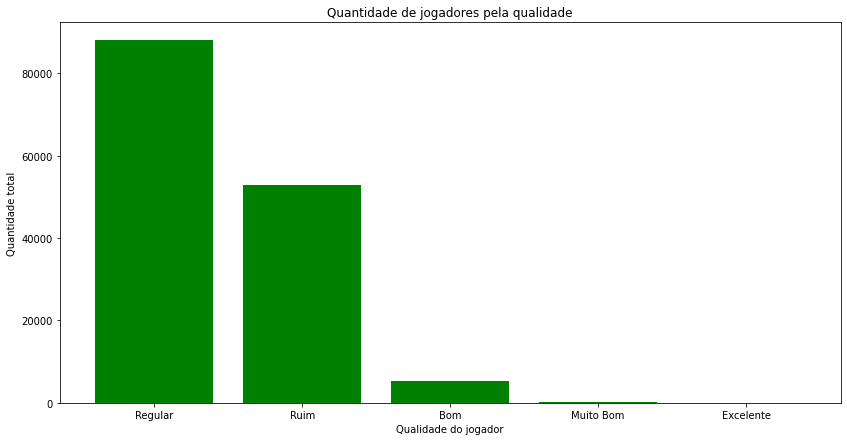

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(df_l['playerQuality'].unique(),df_l['playerQuality'].value_counts(), color='green')
plt.ylabel('Quantidade total')
plt.xlabel('Qualidade do jogador')
plt.title('Quantidade de jogadores pela qualidade')
plt.show()

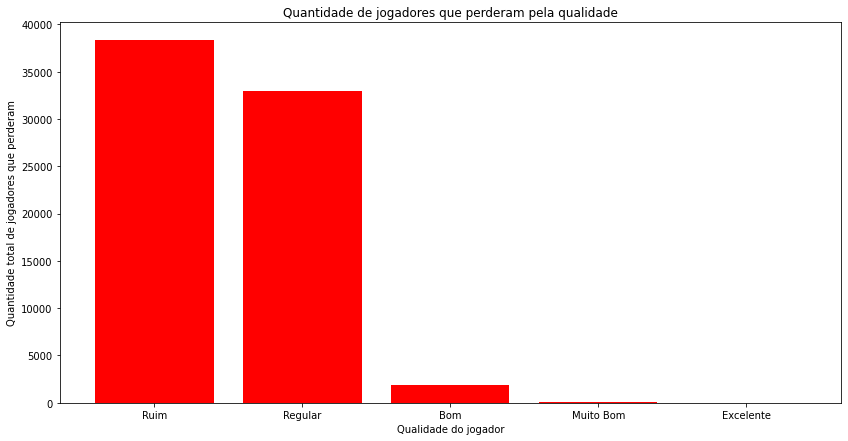

In [ ]:
plt.figure(figsize=(14, 7))
playersLosers = df_l[df_l["flWinner"]==0]
plt.bar(playersLosers['playerQuality'].unique(),playersLosers['playerQuality'].value_counts(), color='red')
plt.ylabel('Quantidade total de jogadores que perderam')
plt.xlabel('Qualidade do jogador')
plt.title('Quantidade de jogadores que perderam pela qualidade')
plt.show()

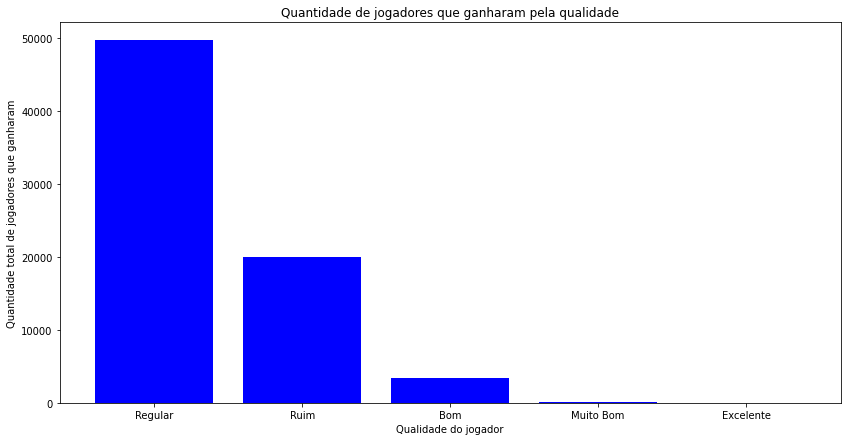

In [ ]:
plt.figure(figsize=(14, 7))
playersWinners = df_l[df_l["flWinner"]==1]
plt.bar(playersWinners['playerQuality'].unique(),playersWinners['playerQuality'].value_counts(), color='blue')
plt.ylabel('Quantidade total de jogadores que ganharam')
plt.xlabel('Qualidade do jogador')
plt.title('Quantidade de jogadores que ganharam pela qualidade')
plt.show()

Após uma vizualização de dados relacionados a vitória e a derrota através da qualidade do jogador pode-se concluir que como os dados estão pareados e não muito distantes. Dessa forma a qualidade do jogador não está relacionado a conclusão da partida (se o player perdeu ou ganhou)

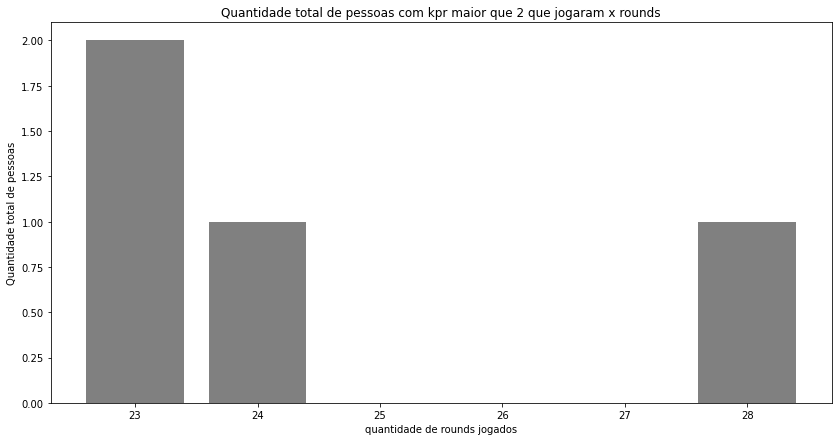

In [ ]:
plt.figure(figsize=(14, 7))
vg = df_l[df_l['kpr']>=2]
plt.bar(vg['qtRoundsPlayed'].unique(), vg['qtRoundsPlayed'].value_counts(), color='gray')
plt.ylabel('Quantidade total de pessoas')
plt.xlabel('quantidade de rounds jogados')
plt.title('Quantidade total de pessoas com kpr maior que 2 que jogaram x rounds')
plt.show()

Players com Kpr alto estão entre 23 a 28 rounds jogados

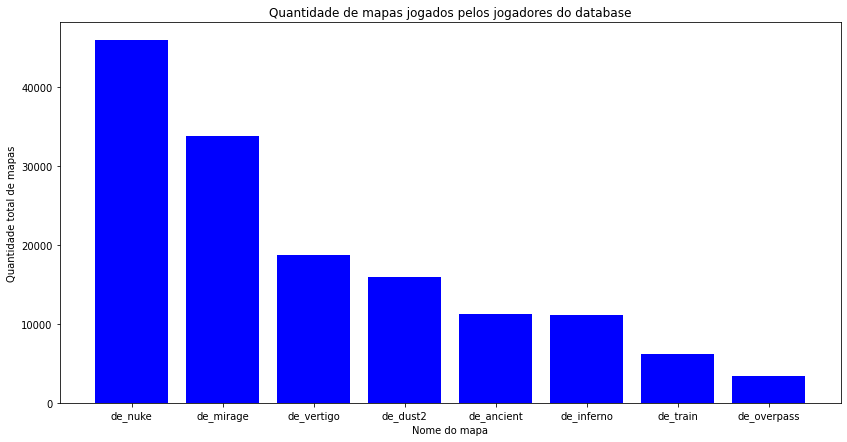

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(df_l['descMapName'].unique(), df_l['descMapName'].value_counts(), color='blue')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapas jogados pelos jogadores do database')
plt.show()

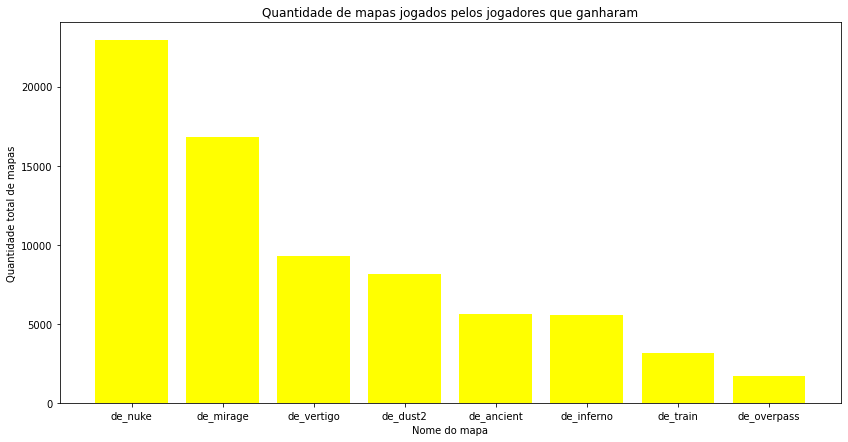

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(playersWinners['descMapName'].unique(), playersWinners['descMapName'].value_counts(), color='yellow')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapas jogados pelos jogadores que ganharam')
plt.show()

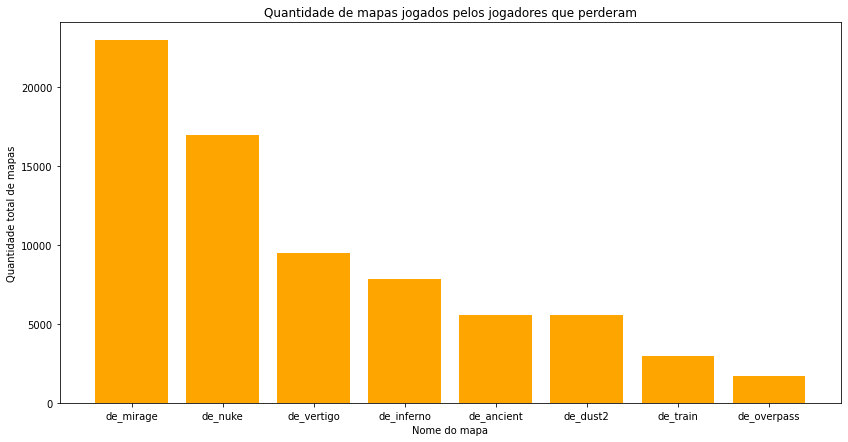

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(playersLosers['descMapName'].unique(), playersLosers['descMapName'].value_counts(), color='orange')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapas jogados pelos jogadores que perderam')
plt.show()

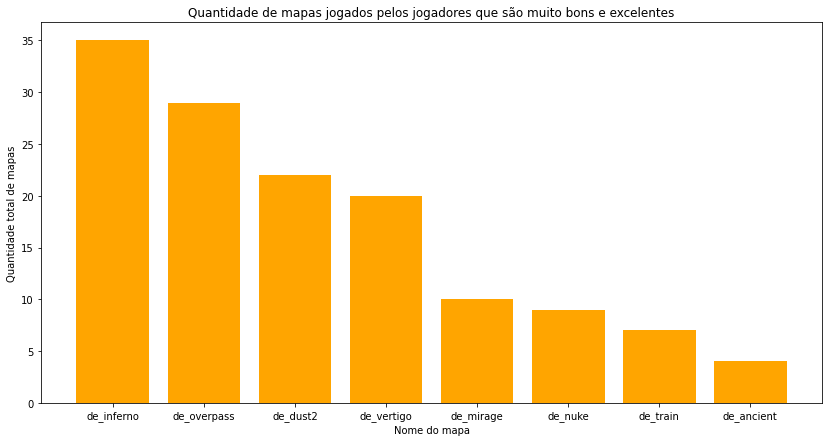

In [ ]:
plt.figure(figsize=(14, 7))
vgp = df_l[df_l['pps']>=60]
plt.bar(vgp['descMapName'].unique(), vgp['descMapName'].value_counts(), color='orange')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapas jogados pelos jogadores que são muito bons e excelentes')
plt.show()
#jogadores com qualidade alta tendem a jogar mais inferno -> Over -> dust2 -> vertigo -> Mirage -> Nuke -> Train -> Ancient

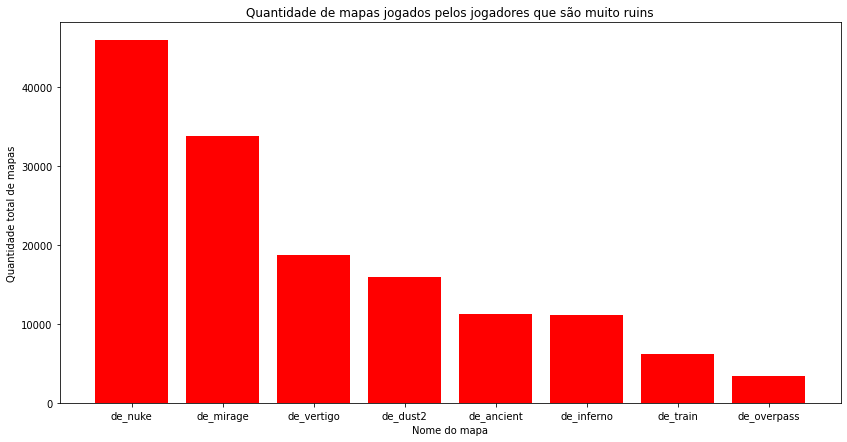

In [ ]:
plt.figure(figsize=(14, 7))
vgp = df_l[df_l['pps']<=60]
plt.bar(vgp['descMapName'].unique(), vgp['descMapName'].value_counts(), color='red')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapas jogados pelos jogadores que são muito ruins')
plt.show()

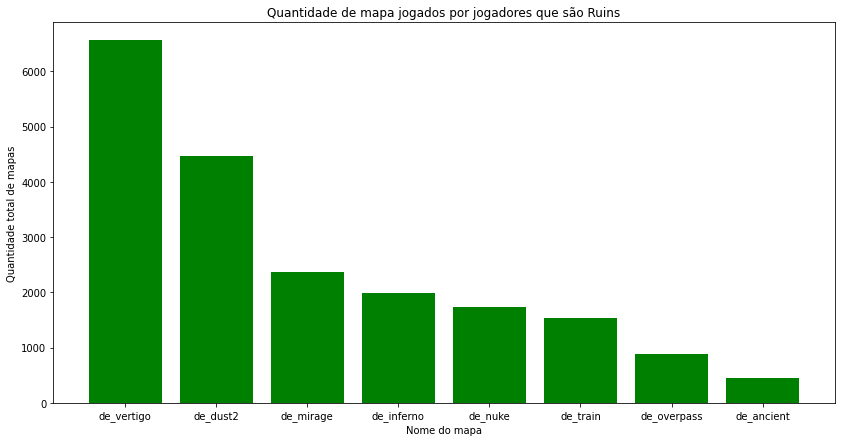

In [ ]:
plt.figure(figsize=(14, 7))
vgpl = playersWinners[playersWinners['playerQuality']=='Ruim']
plt.bar(vgpl['descMapName'].unique(), vgpl['descMapName'].value_counts(), color='Green')
plt.ylabel('Quantidade total de mapas')
plt.xlabel('Nome do mapa')
plt.title('Quantidade de mapa jogados por jogadores que são Ruins')
plt.show()

Os mapas mais jogados possuem players que perderam e possuem qualidade baixa.

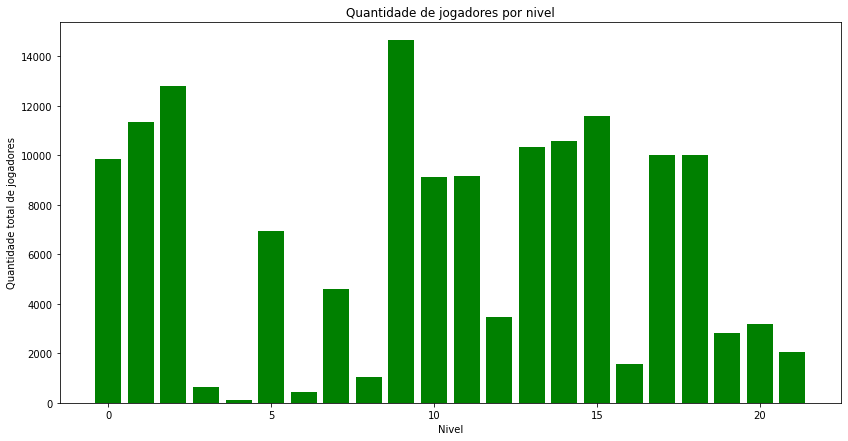

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(df_l['vlLevel'].unique(), df_l['vlLevel'].value_counts(), color='green')
plt.ylabel('Quantidade total de jogadores')
plt.xlabel('Nivel')
plt.title('Quantidade de jogadores por nivel')
plt.show()

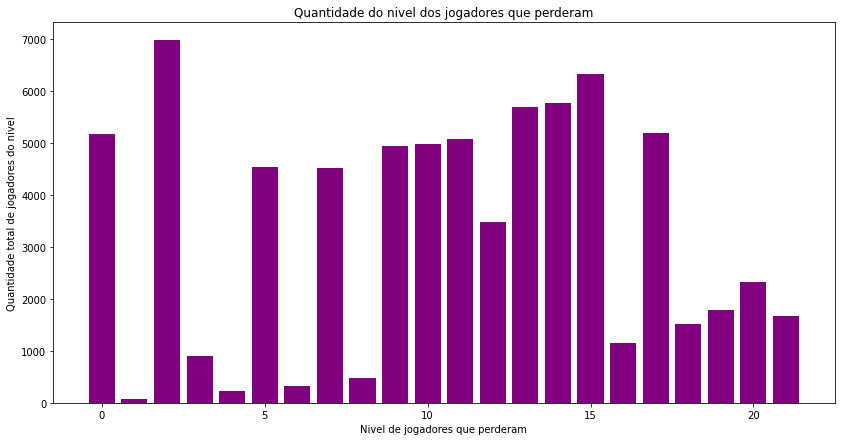

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(playersLosers['vlLevel'].unique(), playersLosers['vlLevel'].value_counts(), color='purple')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores que perderam')
plt.show()

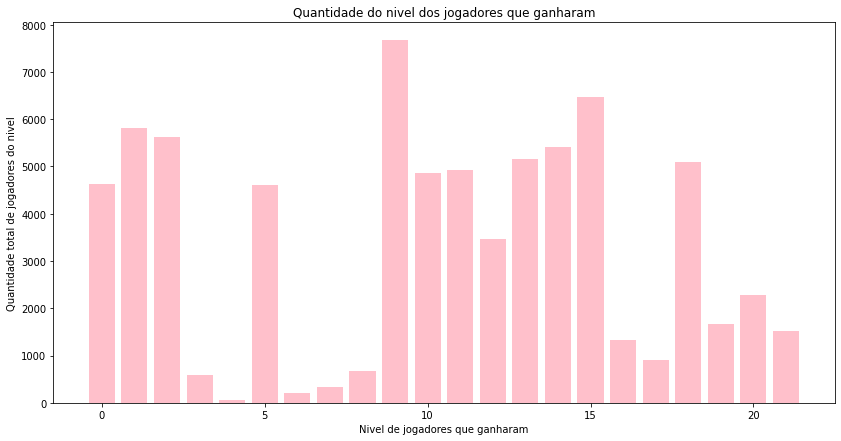

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(playersWinners['vlLevel'].unique(), playersWinners['vlLevel'].value_counts(), color='pink')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que ganharam')
plt.title('Quantidade do nivel dos jogadores que ganharam')
plt.show()

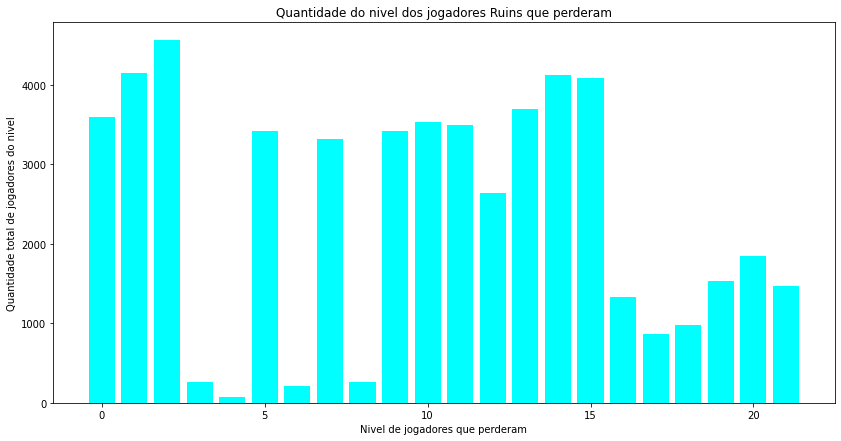

In [ ]:
plt.figure(figsize=(14, 7))
pqr = df_l[df_l["playerQuality"]=='Ruim']
plt.bar(pqr['vlLevel'].unique(), pqr['vlLevel'].value_counts(), color='cyan')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores Ruins que perderam')
plt.show()

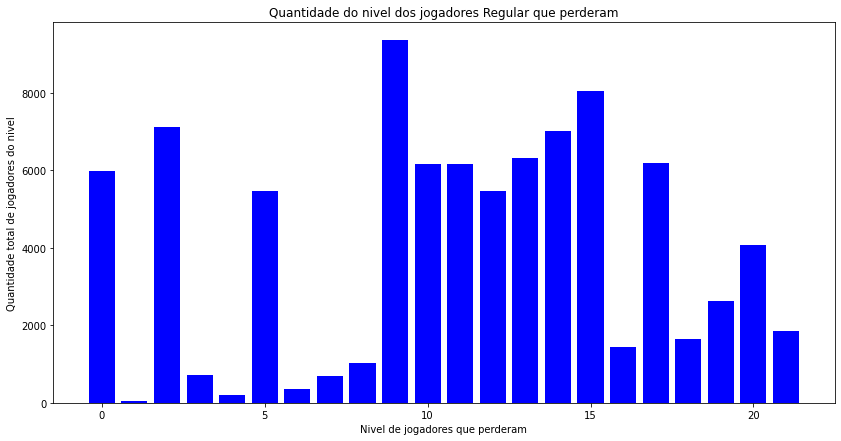

In [ ]:
plt.figure(figsize=(14, 7))
pqr = df_l[df_l["playerQuality"]=='Regular']
plt.bar(pqr['vlLevel'].unique(), pqr['vlLevel'].value_counts(), color='blue')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores Regular que perderam')
plt.show()

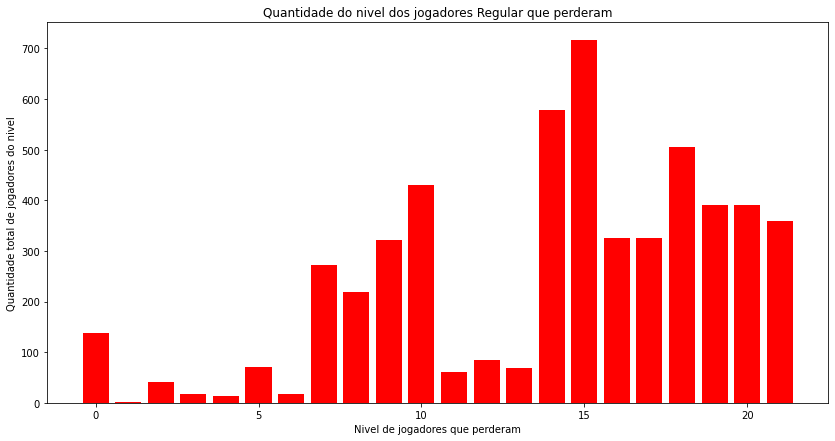

In [ ]:
plt.figure(figsize=(14, 7))
pqr = df_l[df_l["playerQuality"]=='Bom']
plt.bar(pqr['vlLevel'].unique(), pqr['vlLevel'].value_counts(), color='red')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores Regular que perderam')
plt.show()

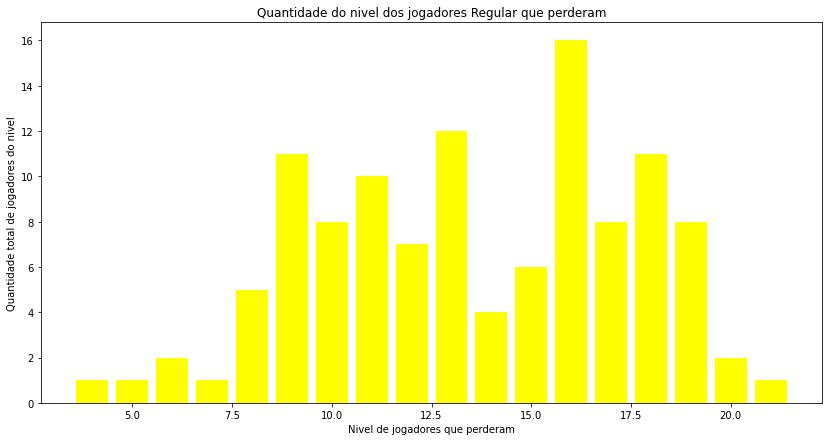

In [ ]:
plt.figure(figsize=(14, 7))
pqr = df_l[df_l["playerQuality"]=='Muito Bom']
plt.bar(pqr['vlLevel'].unique(), pqr['vlLevel'].value_counts(), color='yellow')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores Regular que perderam')
plt.show()

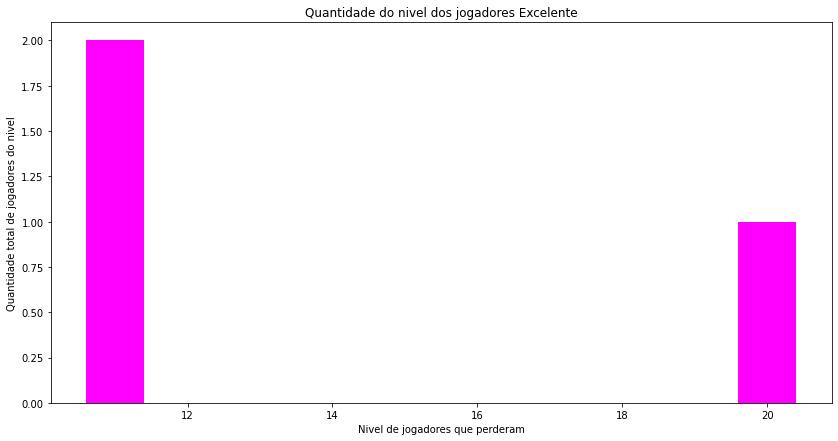

In [ ]:
plt.figure(figsize=(14, 7))
pqr = df_l[df_l["playerQuality"]=='Excelente']
plt.bar(pqr['vlLevel'].unique(), pqr['vlLevel'].value_counts(), color='magenta')
plt.ylabel('Quantidade total de jogadores do nivel')
plt.xlabel('Nivel de jogadores que perderam')
plt.title('Quantidade do nivel dos jogadores Excelente')
plt.show()

**Após a avaliação de nivel por qualidade podemos ver que até nas melhores onivel mais alto nao está tao relacionado.**

In [ ]:
df_l['pps'].describe()

count    146381.000000
mean         23.866793
std           8.441445
min           0.000000
25%          17.857143
50%          22.857143
75%          29.285714
max          90.714286
Name: pps, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'kpr por mapa')

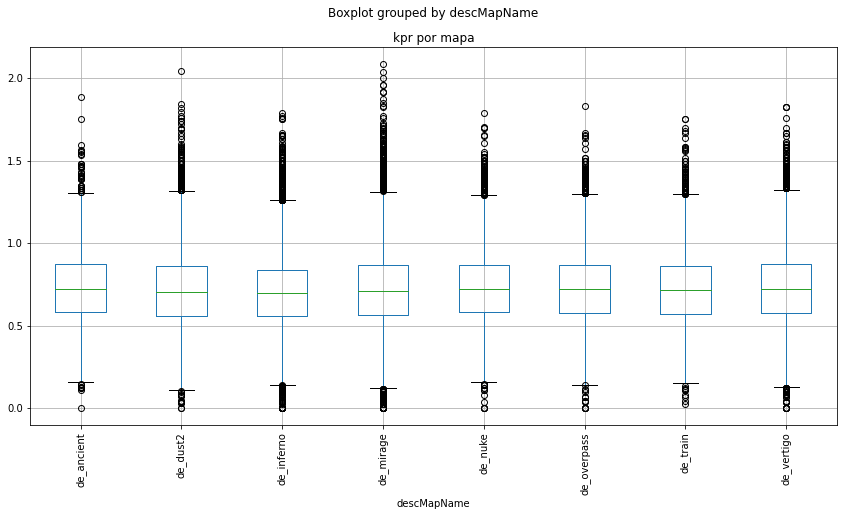

In [ ]:
killPorMapa = df_l.boxplot(column='kpr',by="descMapName", figsize=(14,7), rot =90)
killPorMapa.set_title("kpr por mapa")
#inconclusivo por enquanto, pois o mapa que tem mais kills também é o mapa mais jogado
#isso deve ser calculado com base na media de kills por partida 

In [ ]:
x = df_l.groupby('descMapName')
y = x['qtKill'].count()
x['qtKill'].describe()
#MEDIA DE KILLS POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,3385.0,20.860561,7.156520,0.0,16.0,20.0,25.0,61.0
de_dust2,18753.0,20.383192,7.160521,0.0,15.0,20.0,25.0,85.0
de_inferno,33833.0,20.093843,6.846416,0.0,15.0,19.0,24.0,70.0
de_mirage,45887.0,20.548521,7.164227,0.0,16.0,20.0,25.0,73.0
de_nuke,11205.0,20.733244,7.000355,0.0,16.0,20.0,25.0,60.0
de_overpass,11151.0,20.739127,6.977826,0.0,16.0,20.0,25.0,67.0
de_train,6166.0,20.541356,7.107641,1.0,16.0,20.0,25.0,68.0
de_vertigo,16001.0,20.819761,7.142549,0.0,16.0,20.0,25.0,63.0


In [ ]:
x = df_l.groupby('descMapName')
y = x['qtClutchWon'].count()
x['qtClutchWon'].describe()
#MEDIA DE CLUTCH POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,3385.0,0.536780,0.757092,0.0,0.0,0.0,1.0,6.0
de_dust2,18753.0,0.501786,0.733980,0.0,0.0,0.0,1.0,5.0
de_inferno,33833.0,0.473827,0.711546,0.0,0.0,0.0,1.0,8.0
de_mirage,45887.0,0.501602,0.731685,0.0,0.0,0.0,1.0,6.0
de_nuke,11205.0,0.535475,0.763382,0.0,0.0,0.0,1.0,7.0
de_overpass,11151.0,0.525065,0.748256,0.0,0.0,0.0,1.0,6.0
de_train,6166.0,0.513623,0.739167,0.0,0.0,0.0,1.0,5.0
de_vertigo,16001.0,0.544653,0.766092,0.0,0.0,0.0,1.0,8.0


In [ ]:
x = df_l.groupby('descMapName')
y = x['kpr'].count()
x['kpr'].describe()

#MEDIA DE KPR POR MAPA

,count,mean,std,min,25%,50%,75%,max
descMapName,,,,,,,,
de_ancient,3385.0,0.733093,0.222625,0.000000,0.583333,0.720000,0.872340,1.888889
de_dust2,18753.0,0.719242,0.225617,0.000000,0.560000,0.703704,0.862069,2.043478
de_inferno,33833.0,0.707770,0.215346,0.000000,0.560000,0.695652,0.840000,1.791667
de_mirage,45887.0,0.725310,0.226072,0.000000,0.566667,0.708333,0.866667,2.083333
de_nuke,11205.0,0.730903,0.219040,0.000000,0.583333,0.720000,0.866667,1.791667
de_overpass,11151.0,0.729663,0.217308,0.000000,0.576923,0.720000,0.866667,1.833333
de_train,6166.0,0.725927,0.223992,0.027778,0.571429,0.714286,0.862069,1.750000
de_vertigo,16001.0,0.734103,0.222906,0.000000,0.576923,0.722222,0.875000,1.827586


In [ ]:
kill = df_l.qtKill.sum() #quantidade de kills do DataBase
flash = df_l.qtFlashAssist.sum()

flash/kill #porcentagem de kills que tiveram auxilio de flashs
#aproximadamente 2% das kills apenas tem assistencia de flashs

0.029936208247012232

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Kpr por qualidade de player')

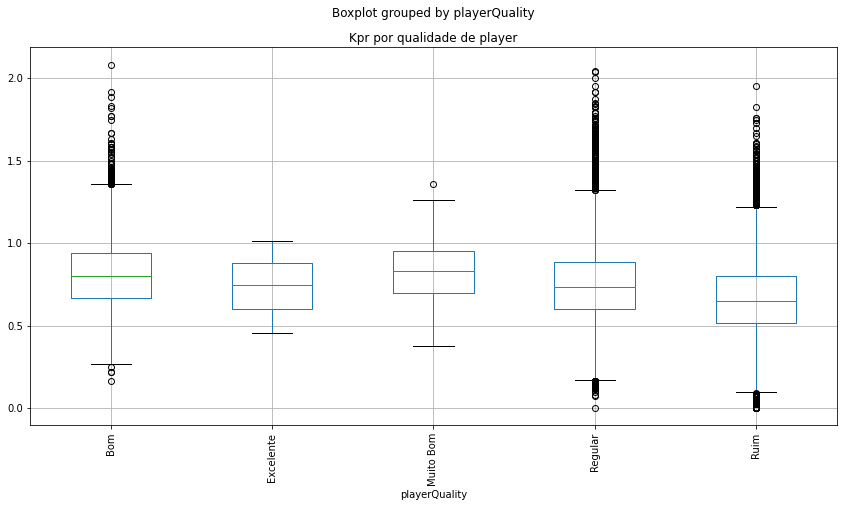

In [ ]:
killPorQualidade = df_l.boxplot(column='kpr',by="playerQuality", figsize=(14,7), rot =90)
killPorQualidade.set_title("Kpr por qualidade de player")

In [ ]:
win = df_l['flWinner']>0
win.value_counts()

True     73235
False    73146
Name: flWinner, dtype: int64

In [ ]:
df_l['qtSurvived']

1          8.0
2          2.0
3          3.0
4          4.0
11         6.0
          ... 
184146     9.0
184147    11.0
184148     7.0
184149     4.0
184150     5.0
Name: qtSurvived, Length: 146381, dtype: object

In [ ]:
a = df_l[['dpr', 'qtSurvived']]
b = df_l[['vlDamage', 'qtKill']]

In [ ]:
a.corr()

,dpr
dpr,1.0


In [ ]:
b.corr()

,vlDamage,qtKill
vlDamage,1.000000,0.948231
qtKill,0.948231,1.000000


In [ ]:
df_l['dpr'].describe()
uniques = df_l[df_l['dpr'] > 1]
uniques[['dpr','qtDeath','qtRoundsPlayed']]

,dpr,qtDeath,qtRoundsPlayed


In [ ]:
#para se colocar alguma afirmação deve saber pela quantidade de rounds jogados? Podemos considerar que a partir de uma quantidade minima de rounds para entrar no calculo? partidas muito longas podem ser retiradas?
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146381 entries, 1 to 184150
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   qtKill          146381 non-null  int64  
 1   qtAssist        146381 non-null  int64  
 2   qtDeath         146381 non-null  int64  
 3   qtHs            146381 non-null  int64  
 4   qtBombeDefuse   146381 non-null  int64  
 5   qtBombePlant    146381 non-null  int64  
 6   qt1Kill         146381 non-null  int64  
 7   qt2Kill         146381 non-null  int64  
 8   qt3Kill         146381 non-null  int64  
 9   qt4Kill         146381 non-null  int64  
 10  qt5Kill         146381 non-null  int64  
 11  qtFirstKill     146381 non-null  int64  
 12  vlDamage        146381 non-null  int64  
 13  qtHits          146381 non-null  float64
 14  qtLastAlive     146381 non-null  float64
 15  qtClutchWon     146381 non-null  int64  
 16  qtRoundsPlayed  146381 non-null  int64  
 17  descMapNam

In [ ]:
#regras de associação
#kpr < 0.5 - ruim, Kpr>=0.5 < 1.0 - regular, 1-1.3 bom; 1.3-1.5 - muito bom; 1.5 - excelente
bins = [0, 0.5, 1, 1.3, 1.5, np.inf]
names = ['Ruim', 'Regular', 'Bom', 'Muito Bom', 'Excelente']
df_l['kpr_categoric'] = pd.cut(df_l['kpr'], bins, labels=names)

In [ ]:
#dpr 0:0.2 - Excelente, 0.2:0.4 - Muito bom, 0.4:0.6 - Bom; 0.6:0.8 - Regular; 0.8 - Ruim
bins = [0, 0.2, 0.4, 0.6, 0.8, np.inf]
names = ['Excelente', 'Muito Bom', 'Bom', 'Regular', 'Ruim']
df_l['dpr_categoric'] = pd.cut(df_l['dpr'], bins, labels=names)

In [ ]:
df_l

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,qt2Kill,qt3Kill,qt4Kill,...,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps,playerQuality,dM50,kpr_categoric,dpr_categoric
1,24,3,18,6,0,4,9,4,1,1,...,1.0,0.0,1,0.888889,0.666667,23.571429,Regular,0,Regular,Regular
2,6,4,23,2,0,1,4,1,0,0,...,3.0,0.0,0,0.240000,0.920000,17.857143,Ruim,0,Ruim,Ruim
3,10,5,20,4,1,0,6,2,0,0,...,4.0,0.0,1,0.400000,0.800000,23.571429,Regular,0,Ruim,Regular
4,8,4,26,6,0,2,4,2,0,0,...,4.0,2.0,0,0.266667,0.866667,22.857143,Regular,0,Ruim,Ruim
11,19,2,21,7,0,0,9,5,0,0,...,3.0,3.0,0,0.703704,0.777778,18.571429,Ruim,0,Regular,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184146,17,3,19,7,0,2,12,1,1,0,...,4.0,0.0,0,0.607143,0.678571,20.714286,Regular,0,Regular,Regular
184147,21,3,13,5,1,1,8,5,1,0,...,0.0,0.0,1,0.807692,0.500000,15.714286,Ruim,1,Regular,Bom
184148,15,1,22,5,0,1,11,2,0,0,...,5.0,0.0,1,0.517241,0.758621,18.571429,Ruim,0,Regular,Regular
184149,9,6,23,2,0,3,9,0,0,0,...,2.0,0.0,0,0.333333,0.851852,25.000000,Regular,0,Ruim,Ruim


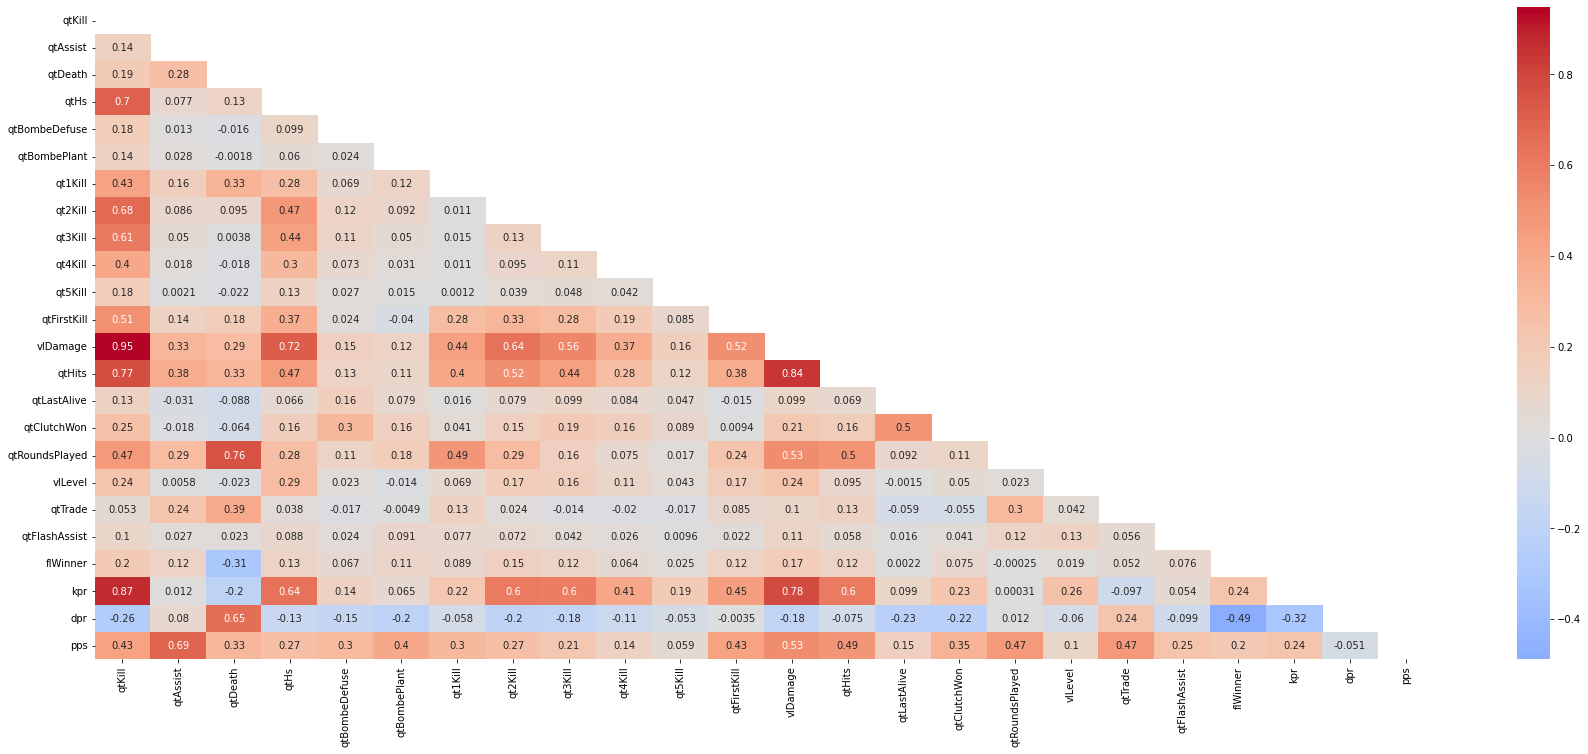

In [ ]:
Var_Corr = df_l.corr()
matrix = np.triu(df_l.corr())

plt.figure(figsize = (30,12))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

Pode-se ver pelos dados que temos valores com relações altas, como exemplo o dpr e flwinner, eles são inversamente proporcionais, qtHits com phs, vlDamage e qtKill. Dessa forma podemos perceber que os valores numéricos realmente estão ligados através do heat map, dessa forma aplicar clusterização podemos ter uma forma melhor de agrupamento de dados. Porém seria interessante também observar se os valores categóricos podem nos aplicar alguma sentença

In [ ]:
df_rules = df_l[['kpr_categoric','dpr_categoric','playerQuality','descMapName', 'flWinner', 'dM50']]
df_rules.head()

,kpr_categoric,dpr_categoric,playerQuality,descMapName,flWinner,dM50
1,Regular,Regular,Regular,de_nuke,1,0
2,Ruim,Ruim,Ruim,de_mirage,0,0
3,Ruim,Regular,Regular,de_mirage,1,0
4,Ruim,Ruim,Regular,de_nuke,0,0
11,Regular,Regular,Ruim,de_mirage,0,0


In [ ]:
df_transactions = pd.get_dummies(df_rules)
#df_transactions = df_rules
#df_transactions = pd.get_dummies(df_transactions, columns=['kpr_categoric'])
#df_transactions = pd.get_dummies(df_transactions, columns=['dpr_categoric'])
#df_transactions = pd.get_dummies(df_transactions, columns=['playerQuality'])
#df_transactions = pd.get_dummies(df_transactions, columns=['descMapName'])

In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146381 entries, 1 to 184150
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   flWinner                 146381 non-null  int64
 1   kpr_categoric_Ruim       146381 non-null  uint8
 2   kpr_categoric_Regular    146381 non-null  uint8
 3   kpr_categoric_Bom        146381 non-null  uint8
 4   kpr_categoric_Muito Bom  146381 non-null  uint8
 5   kpr_categoric_Excelente  146381 non-null  uint8
 6   dpr_categoric_Excelente  146381 non-null  uint8
 7   dpr_categoric_Muito Bom  146381 non-null  uint8
 8   dpr_categoric_Bom        146381 non-null  uint8
 9   dpr_categoric_Regular    146381 non-null  uint8
 10  dpr_categoric_Ruim       146381 non-null  uint8
 11  playerQuality_Bom        146381 non-null  uint8
 12  playerQuality_Excelente  146381 non-null  uint8
 13  playerQuality_Muito Bom  146381 non-null  uint8
 14  playerQuality_Regular    146381 non-

In [ ]:
#Erro pois não tem apenas 0 ou 1
frequent_itemsets = apriori(df_transactions, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500304,(flWinner)
1,0.740356,(kpr_categoric_Regular)
2,0.673837,(dpr_categoric_Regular)
3,0.601205,(playerQuality_Regular)
4,0.361454,(playerQuality_Ruim)
5,0.313476,(descMapName_de_mirage)
6,0.969033,(dM50_0)
7,0.378341,"(kpr_categoric_Regular, flWinner)"
8,0.342066,"(dpr_categoric_Regular, flWinner)"
9,0.339559,"(playerQuality_Regular, flWinner)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(dpr_categoric_Regular, flWinner)",(dM50_0),0.342066,0.969033,0.342066,1.0,1.031957,0.010593,inf
48,"(kpr_categoric_Regular, dpr_categoric_Regular)",(dM50_0),0.518510,0.969033,0.518510,1.0,1.031957,0.016057,inf
16,(dpr_categoric_Regular),(dM50_0),0.673837,0.969033,0.673837,1.0,1.031957,0.020867,inf
66,"(kpr_categoric_Regular, playerQuality_Regular,...",(dM50_0),0.328335,0.969033,0.328335,1.0,1.031957,0.010168,inf
60,"(playerQuality_Regular, dpr_categoric_Regular)",(dM50_0),0.418675,0.969033,0.418675,1.0,1.031957,0.012965,inf


In [ ]:
cols_interesse = ['kpr_categoric_Ruim','kpr_categoric_Regular','kpr_categoric_Bom','kpr_categoric_Muito Bom','kpr_categoric_Excelente  ',
                  'dpr_categoric_Ruim','dpr_categoric_Regular','dpr_categoric_Bom','dpr_categoric_Muito Bom','dpr_categoric_Excelente  ',
                  'playerQuality_Bom', 'playerQuality_Muito Bom', 'playerQuality_Regular', 'playerQuality_Ruim', 'playerQuality_Excelente',
                  'descMapName_de_ancient', 'descMapName_de_dust2', 'descMapName_de_inferno', 'descMapName_de_mirage', 'descMapName_de_nuke',
                  'descMapName_de_overpass', 'descMapName_de_train', 'descMapName_de_vertigo'
                  ]


In [ ]:
df = pd.get_dummies(df_l, columns=["playerQuality"])

In [ ]:
df

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qt1Kill,qt2Kill,qt3Kill,qt4Kill,...,dpr,pps,dM50,kpr_categoric,dpr_categoric,playerQuality_Bom,playerQuality_Excelente,playerQuality_Muito Bom,playerQuality_Regular,playerQuality_Ruim
1,24,3,18,6,0,4,9,4,1,1,...,0.666667,23.571429,0,Regular,Regular,0,0,0,1,0
2,6,4,23,2,0,1,4,1,0,0,...,0.920000,17.857143,0,Ruim,Ruim,0,0,0,0,1
3,10,5,20,4,1,0,6,2,0,0,...,0.800000,23.571429,0,Ruim,Regular,0,0,0,1,0
4,8,4,26,6,0,2,4,2,0,0,...,0.866667,22.857143,0,Ruim,Ruim,0,0,0,1,0
11,19,2,21,7,0,0,9,5,0,0,...,0.777778,18.571429,0,Regular,Regular,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184146,17,3,19,7,0,2,12,1,1,0,...,0.678571,20.714286,0,Regular,Regular,0,0,0,1,0
184147,21,3,13,5,1,1,8,5,1,0,...,0.500000,15.714286,1,Regular,Bom,0,0,0,0,1
184148,15,1,22,5,0,1,11,2,0,0,...,0.758621,18.571429,0,Regular,Regular,0,0,0,0,1
184149,9,6,23,2,0,3,9,0,0,0,...,0.851852,25.000000,0,Ruim,Ruim,0,0,0,1,0


In [ ]:
cols_interesse = ['qtKill','qtDeath','vlDamage','qtClutchWon','vlLevel','qtHs','qt5Kill','kpr','dpr','pps','playerQuality_Bom','playerQuality_Excelente','playerQuality_Muito Bom','playerQuality_Regular','playerQuality_Ruim']
target = 'flWinner'

In [ ]:
cols_interesse_all = cols_interesse.copy()
cols_interesse_all.append(target)

Coeficiente estimado:  [-2.3578828]
R2 (score):  0.2385279990828909
Intercept 2.176 
     Coefficient
dpr    -2.357883
Estimated coefficients:
b_0 = 2.176360849058079 nb_1 = -2.3578827975859444


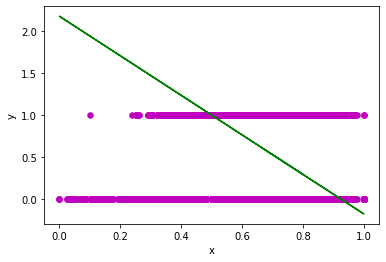

In [ ]:
X = df['dpr']
Y = df[target]
regressao_linear(X,Y,['dpr'])

b = estimate_coef(df['dpr'],df[target]) 
print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(df['dpr'], df[target], b)

In [ ]:
X = df['vlDamage']
Y = df['kpr']
regressao_linear(X,Y,['vlDamage'])

Coeficiente estimado:  [0.00021285]
R2 (score):  0.6126123877692518
Intercept 0.151 
          Coefficient
vlDamage     0.000213


In [ ]:
X = df['vlDamage']
Y = df['qtHits']
regressao_linear(X,Y,['vlDamage'])

Coeficiente estimado:  [0.02221618]
R2 (score):  0.7124853051191407
Intercept 9.194 
          Coefficient
vlDamage     0.022216


Previsão

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

def classifier(X_train,X_test,Y_train,Y_test):
    #Aplicando KNN
    print(" KNN ")
    ini = time.time() #Inicio do calculo do tempo

    knn=KNeighborsClassifier()
    knn.fit(X_train,Y_train)

    end = time.time()
    knn_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,knn.predict(X_test)))
    print(confusion_matrix(Y_test, knn.predict(X_test)))
    print()
    
    #Aplicando Arvore de Decisao
    print("Árvore de Decisão")
    ini = time.time() #Inicio do calculo do tempo

    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))
    print(confusion_matrix(Y_test, dtc.predict(X_test)))
    print(dtc_time)
    print(knn_time)

In [ ]:
df['dM50'].unique()

array([0, 1], dtype=object)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df['dM50'],df['flWinner'],test_size=0.3, random_state=5)

In [ ]:
classifier(X_train.values.reshape(-1, 1),X_test.values.reshape(-1, 1),Y_train,Y_test)

 KNN 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21848
           1       0.50      1.00      0.67     22067

    accuracy                           0.50     43915
   macro avg       0.25      0.50      0.33     43915
weighted avg       0.25      0.50      0.34     43915

[[    0 21848]
 [    0 22067]]

Árvore de Decisão
              precision    recall  f1-score   support

           0       0.51      0.99      0.67     21848
           1       0.90      0.06      0.10     22067

    accuracy                           0.52     43915
   macro avg       0.70      0.52      0.39     43915
weighted avg       0.71      0.52      0.39     43915

[[21711   137]
 [20840  1227]]
0.018717288970947266
0.10547757148742676


Clusterização

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146381 entries, 1 to 184150
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   qtKill          146381 non-null  int64   
 1   qtAssist        146381 non-null  int64   
 2   qtDeath         146381 non-null  int64   
 3   qtHs            146381 non-null  int64   
 4   qtBombeDefuse   146381 non-null  int64   
 5   qtBombePlant    146381 non-null  int64   
 6   qt1Kill         146381 non-null  int64   
 7   qt2Kill         146381 non-null  int64   
 8   qt3Kill         146381 non-null  int64   
 9   qt4Kill         146381 non-null  int64   
 10  qt5Kill         146381 non-null  int64   
 11  qtFirstKill     146381 non-null  int64   
 12  vlDamage        146381 non-null  int64   
 13  qtHits          146381 non-null  float64 
 14  qtLastAlive     146381 non-null  float64 
 15  qtClutchWon     146381 non-null  int64   
 16  qtRoundsPlayed  146381 non-null  int64

In [ ]:
cols_interesse = ['qt1Kill','qt2Kill','qt3Kill','qt4Kill','qt5Kill','qtFirstKill',
                  'vlDamage','qtHits', 'qtLastAlive', 'qtClutchWon','vlLevel','qtSurvived','qtTrade','qtFlashAssist','flWinner','kpr','dpr','pps']
df[cols_interesse]

,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtLastAlive,qtClutchWon,vlLevel,qtSurvived,qtTrade,qtFlashAssist,flWinner,kpr,dpr,pps
1,9,4,1,1,0,3,2933,54.0,1.0,1,9,8.0,1.0,0.0,1,0.888889,0.666667,23.571429
2,4,1,0,0,0,2,1117,31.0,0.0,0,2,2.0,3.0,0.0,0,0.240000,0.920000,17.857143
3,6,2,0,0,0,1,1740,63.0,1.0,1,15,3.0,4.0,0.0,1,0.400000,0.800000,23.571429
4,4,2,0,0,0,1,1696,51.0,0.0,0,2,4.0,4.0,2.0,0,0.266667,0.866667,22.857143
11,9,5,0,0,0,4,2459,55.0,0.0,0,2,6.0,3.0,3.0,0,0.703704,0.777778,18.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184146,12,1,1,0,0,3,2179,63.0,0.0,0,9,9.0,4.0,0.0,0,0.607143,0.678571,20.714286
184147,8,5,1,0,0,3,2610,88.0,1.0,0,9,11.0,0.0,0.0,1,0.807692,0.500000,15.714286
184148,11,2,0,0,0,5,2154,63.0,0.0,0,9,7.0,5.0,0.0,1,0.517241,0.758621,18.571429
184149,9,0,0,0,0,2,1701,59.0,0.0,0,9,4.0,2.0,0.0,0,0.333333,0.851852,25.000000


In [ ]:
def plot_cluster(model, df, attr_x, attr_y):
  plt.figure(figsize=(15,9))
  sns.scatterplot(x=df[attr_x], y=df[attr_y], hue=model.labels_, s=40)
  plt.title('Classificação K-Means') 
    
  plt.show()

Definir numero de clusters através do coeficiente da silhueta

In [ ]:
from sklearn import metrics

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(df[cols_interesse])
labels = kmeans_model.labels_
metrics.silhouette_score(df[cols_interesse], labels, metric='euclidean')

0.5564993927070536

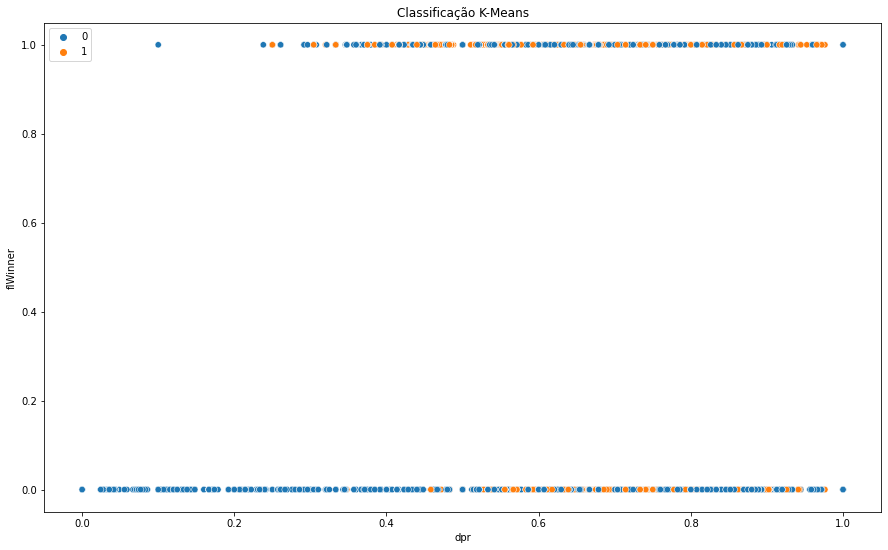

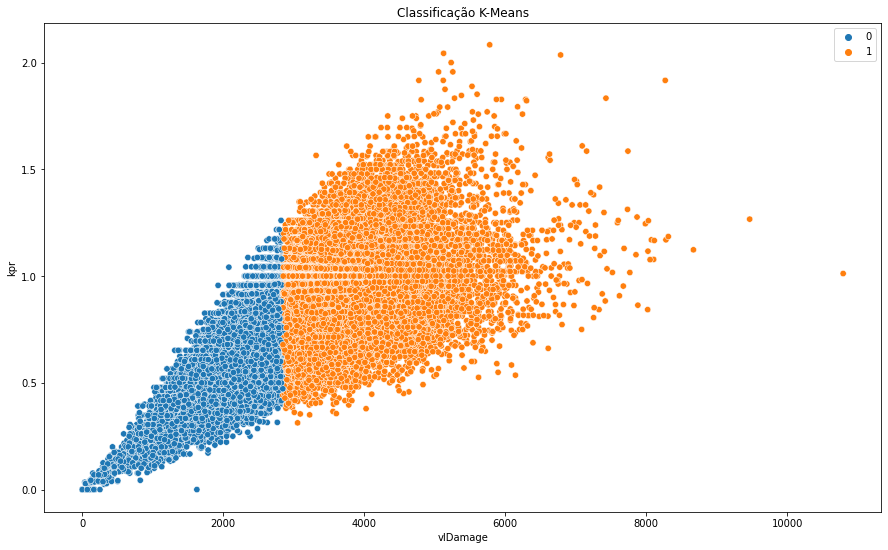

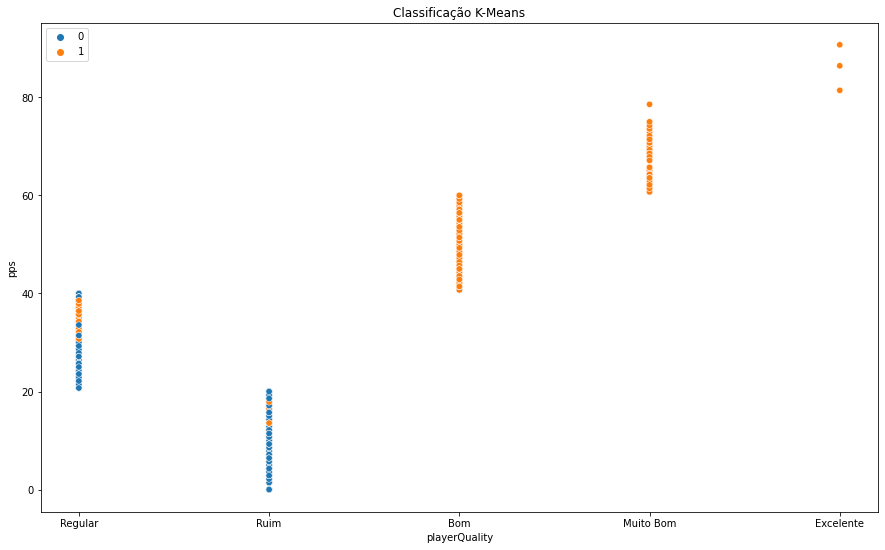

In [ ]:

plot_cluster(kmeans_model, df_l, "dpr","flWinner")
plot_cluster(kmeans_model, df_l, "vlDamage","kpr")
plot_cluster(kmeans_model, df_l, "playerQuality","pps")